# Solución de modelos de sistemas presa-depredador
### 1.2 Introducción
Las ecuaciones de Lotka-Volterra, también conocidas como ecuaciones predador-presa o presa-predador, son un par de ecuaciones diferenciales de primer orden no lineales que se usan para describir dinámicas de sistemas biológicos en el que dos especies interactúan, una como presa y otra como depredador. Las ecuaciones fueron propuestas de forma independiente por Alfred J. Lotka en 1925 y Vito Volterra en 1926. 

A partir de ahí se han usado una gran multitud de variaciones sobre estos modelos que incluyen distintos parametros para modelar las dinamicas de las relaciones entre presa y depredador para modelos ecologicos. Sus aplicaciones pueden ser muy variadas y van desde predecir el comportamiento de los animales en los ecosistemas, su uso en reservas naturales para asegurar las poblaciones de los seres vivos que ahí se encuentran o inclusive más allá y tener aplicaciones en economía para modelar oferta y demanda
![](https://cdn.pixabay.com/photo/2014/08/23/11/12/lion-425150_960_720.jpg)

### 1.3 Objetivos.
> #### 1.1 Objetivo general.
> Resolver un sistema de ecuaciones diferenciales con python.
> #### 1.2 Objetivos específicos
>  - Formular adecuadamente el modelo que represente el problema.
>  - Identificar correctamente las variables y los parametros.
>  - Utilizar las librerias de Python para encontrar la solución óptima.

### 1.4 Modelo que representa el problema
#### Teklu

El modelo que se va a utilizar es uno planteado Teklu Gebreoyohannes de un depredador y dos presas basado en los modelos de Kar y Chaudhuri y Krivan y Esiner que se basan en el modelo de Lotka- Volterra de una presa y un depredador.

$$
\begin{array}{l}
\frac{d x}{d t}=r x\left(1-\frac{x}{k}\right)-a_{1} x y-w_{1} x z \\
\frac{d y}{d t}=s y\left(1-\frac{y}{l}\right)-a_{2} x y-\frac{w_{2} y z}{m+y} \\
\frac{d z}{d t}=-c z+b_{1} w_{1} x(t-\tau) z+b_{2} w_{2} \frac{y(t-\tau) z}{m+y(t-\tau)}
\end{array}
$$

En este modelos las tres variables que se utilizan son:  
$x(t)$ = población de presa 1 a tiempo t  
$y(t)$ = población de presa 2 a tiempo t  
$z(t)$ = población de depredador a tiempo t  

En el ejemplo planteado por Teklu Gebreoyohannes utiliza a antilopes y bufalos como presas y leones como depredadores

#### Parametros
Todos los parametros usados en este modelo son positivos    
$r$ y $s$ son el ritmo de crecimento de las presas $x$ y $y$ respectivamente  
$a_1$ y $a_2$ son los coeficientes de interferencia inter especies de las dos presas  
$k$ y $l$ son la capacidad de almacenamiento del parque nacional de las presas $x$ y $y$ respectivamente  
$w_1$ y $w_2$ son la eficiencia de busqueda por las presas x y y del depredador respectivamente  
$b_1$ y $b_2$ son los factores de regeneción que representan el numero de deppredadores nacidos cuando capturan la primera presa o la segunda presa respectivamente  
$m$ es la mitad del co-eficiencia del depredador  
$\tau$ es la respuesta funcional complejo con la ecuación de crecimiento del depredador para conceder un tiempo de reacción de las presas 


#### Shiva et al

El modelo que plantean Shiva, Srinivas y Pavan es muy similar al modelo planteado por Teklu con algunas modificaciones
En este caso no se representan poblaciones sino densidades de poblaciones
$x(t)$ = densidad de población de presa 1 a tiempo t  
$y(t)$ = densidad de población de presa 2 a tiempo t  
$z(t)$ = densidad de población de depredador a tiempo t  

$$
\begin{array}{l}
\frac{d x}{d t}=r_1 x\left(1-\frac{x}{k_1}\right)-\alpha_{13} x z \\
\frac{d y}{d t}=r_2 y\left(1-\frac{y}{k_2}\right)-\alpha_{23} y z \\
\frac{d z}{d t}=-d z-\alpha_{33} z ^2 w_{1} +\alpha_{31}x(t-\tau)z(t - \tau) +\alpha_{32}y(t-\tau)z(t - \tau)  
\end{array}
$$

#### Parametros
Todos los parametros usados en este modelo son positivos    
$r_1$ y $r_2$ son el ritmo de crecimento de las presas $x$ y $y$ respectivamente  
$\alpha_{13}$ y $\alpha_{23}$ son la razon de decrecimiento de las presas respectivamente
$k_1$ y $k_2$ son la capacidad de almacenamiento del parque nacional de las presas $x$ y $y$ respectivamente   
$d$ es el ratio de mortalidad del depredador  
$\tau$ representa el parametro de retraso temporal  
$\alpha_{31}$ y $\alpha_{32}$ representan la razon de ganancia del depredador acorde a la depredación de las presas $x$ y $y$ respectivamente   
$\alpha_{33}$ representa la razon de decrecimiento del depredador debido a la competicion intra especifica

### 1.5 Solución del problema

In [6]:
#pip install ddeint

  Created wheel for ddeint: filename=ddeint-0.2-cp37-none-any.whl size=3982 sha256=319f89546e827830665c5df1101dcb062d5f1ed47aa18354ac55b704b2948a7d
  Stored in directory: C:\Users\flavi\AppData\Local\pip\Cache\wheels\d4\a3\1d\6cdfd37036ecb725b287d310842331646aff4139903e367dbf
Successfully built ddeint
Note: you may need to restart the kernel to use updated packages.


In [1]:
# importar librerías
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as ode

In [2]:
from ddeint import ddeint

In [15]:
from pylab import array, linspace, subplots

In [81]:
def shivadel (Y,t,tau):
    x,y,z = Y(t)
    xd, yd, zd = Y(t-tau)
    alpha13 = 2.036
    alpha23 = 4
    r1 = 0.625
    r2 = 1.228
    k1 = 10
    k2 = 10
    tau = 2
    alpha31 = 0.112
    alpha32 = 2.02
    alpha33 = 0.15
    c = 1.5
    dx = r1*x*(1-(x/k1)) - alpha13*x*z
    dy = r2*y*(1-(y/k2)) - alpha23*y*z
    dz = -(c*z) -alpha33*z**2  +alpha31*xd*zd +alpha32*yd*zd 
    return [dx,dy,dz]

In [82]:
# Intervalo de tiempo
tt = np.linspace(0,100,10000)

#Condición Inicial
g = lambda t: array([0.5,0.5,0.5])

tau = 0.06
# Solución

soll = ddeint(shivadel,g,tt,fargs=(0.06,))

In [88]:
# Intervalo de tiempo
tt = np.linspace(0,100,10000)

#Condición Inicial
g = lambda t: array([0.5,0.5,0.5])

tau = 0.06
# Solución

sol2 = ddeint(shivadel,g,tt,fargs=(0.2,))

In [94]:
# Intervalo de tiempo
tt = np.linspace(0,100,10000)

#Condición Inicial
g = lambda t: array([0.5,0.5,0.5])

tau = 0.06
# Solución

sol3 = ddeint(shivadel,g,tt,fargs=(0.04,))

In [106]:
def shivadell (Y,t,tau):
    x,y,z = Y(t)
    xd, yd, zd = Y(t-tau)
    alpha13 = 2.036
    alpha23 = 4
    r1 = 0.625
    r2 = 1.228
    k1 = 10
    k2 = 10
    tau = 2
    alpha31 = 0.112
    alpha32 = 2.02
    alpha33 = 0.15
    c = 7
    dx = r1*x*(1-(x/k1)) - alpha13*x*z
    dy = r2*y*(1-(y/k2)) - alpha23*y*z
    dz = -(c*z) -alpha33*z**2  +alpha31*xd*zd +alpha32*yd*zd 
    return [dx,dy,dz]

In [107]:
# Intervalo de tiempo
tt = np.linspace(0,100,10000)

#Condición Inicial
g = lambda t: array([0.5,0.5,0.5])

tau = 0.06
# Solución

sol4 = ddeint(shivadell,g,tt,fargs=(0.06,))

In [110]:
def shivadela (Y,t,tau):
    x,y,z = Y(t)
    xd, yd, zd = Y(t-tau)
    alpha13 = 2.036
    alpha23 = 4
    r1 = 0.625
    r2 = 1.228
    k1 = 10
    k2 = 10
    tau = 2
    alpha31 = 0.112
    alpha32 = 2.02
    alpha33 = 0.15
    c = 0.1
    dx = r1*x*(1-(x/k1)) - alpha13*x*z
    dy = r2*y*(1-(y/k2)) - alpha23*y*z
    dz = -(c*z) -alpha33*z**2  +alpha31*xd*zd +alpha32*yd*zd 
    return [dx,dy,dz]

In [112]:
# Intervalo de tiempo
tt = np.linspace(0,100,10000)

#Condición Inicial
g = lambda t: array([0.5,0.5,0.5])

tau = 0.06
# Solución

sol5 = ddeint(shivadela,g,tt,fargs=(0.06,))

### 1.6 Visualización de los resultados

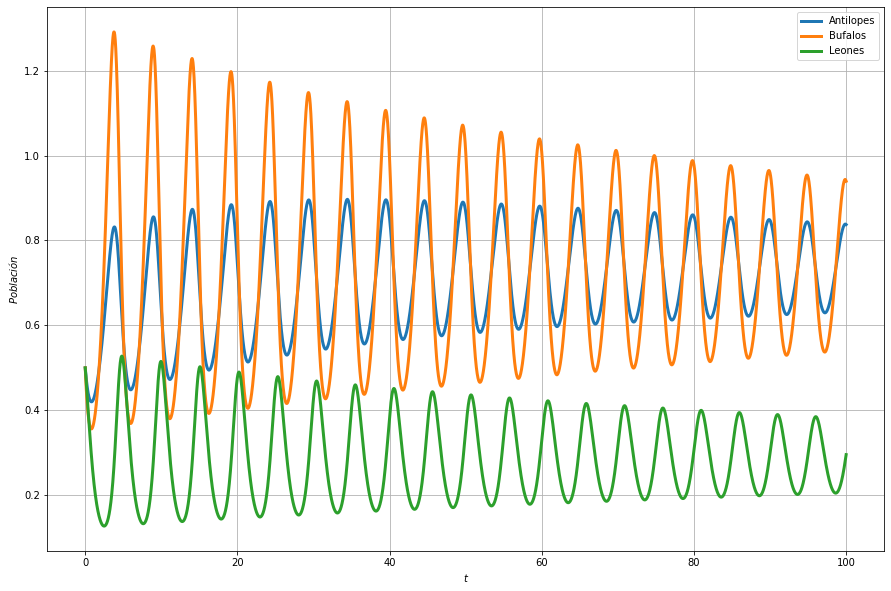

In [83]:
plt.figure(figsize = (15,10))
plt.plot(tt,soll[:,0], lw = 3, label = "Antilopes")
plt.plot(tt,soll[:,1], lw = 3, label = "Bufalos")
plt.plot(tt,soll[:,2], lw = 3, label = "Leones")
plt.xlabel("$t$")
plt.ylabel('$Población$')
plt.legend(loc = "best")
plt.grid()
plt.show()

In [36]:
from mpl_toolkits.mplot3d import Axes3D

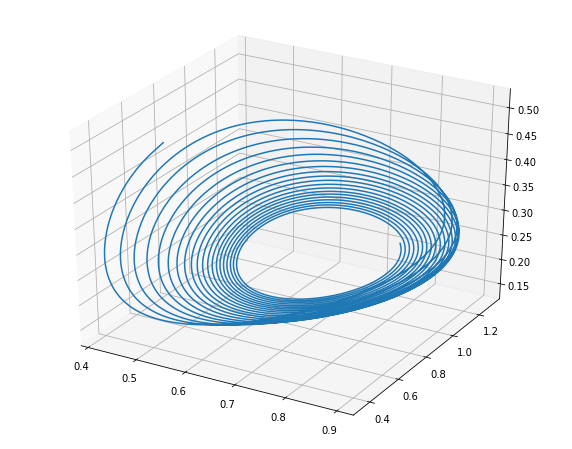

In [84]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection = "3d") #Agregar la tercera dimensión

ax.plot(soll[:,0],soll[:,1],soll[:,2],ms=10)

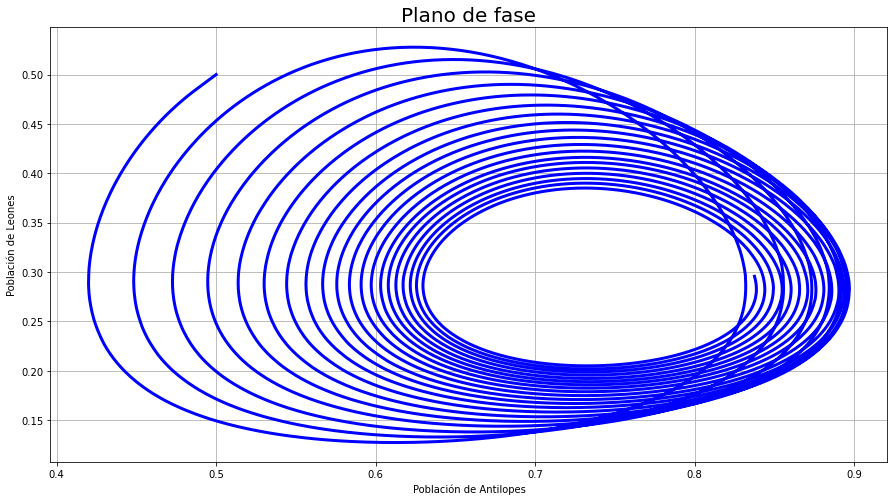

In [85]:
plt.figure(figsize=(15,8))
plt.title("Plano de fase", fontsize=20)
plt.plot(soll[:,0],soll[:,2],"b", lw = 3)
plt.xlabel("Población de Antilopes")
plt.ylabel("Población de Leones")
plt.grid()
plt.show()

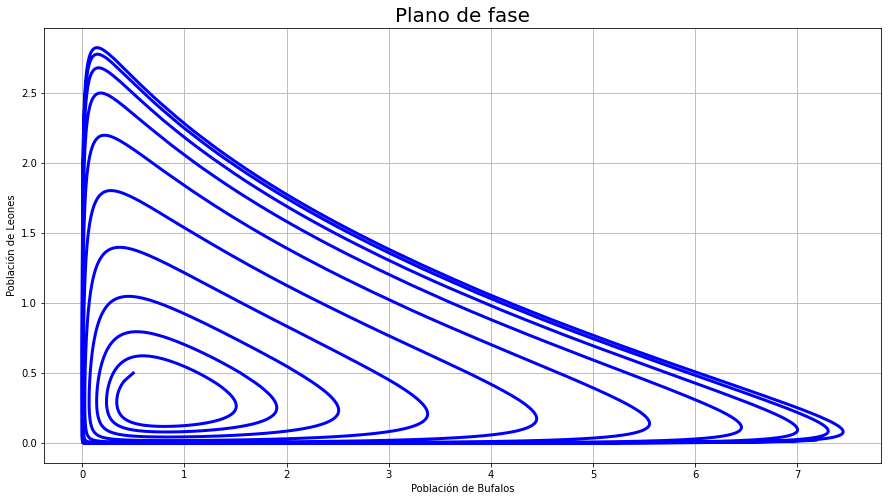

In [101]:
plt.figure(figsize=(15,8))
plt.title("Plano de fase", fontsize=20)
plt.plot(soll[:,1],soll[:,2],"b", lw = 3)
plt.xlabel("Población de Bufalos")
plt.ylabel("Población de Leones")
plt.grid()
plt.show()

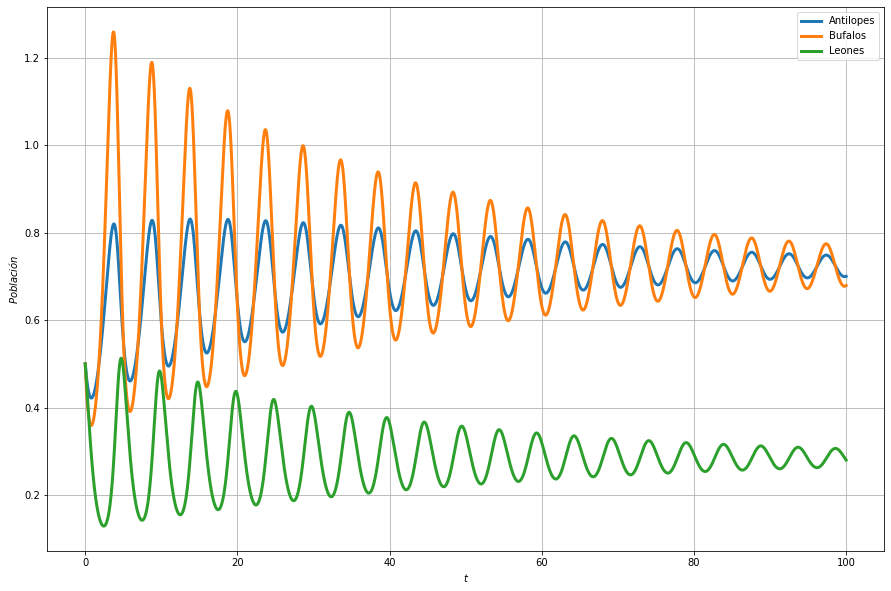

In [95]:
plt.figure(figsize = (15,10))
plt.plot(tt,sol3[:,0], lw = 3, label = "Antilopes")
plt.plot(tt,sol3[:,1], lw = 3, label = "Bufalos")
plt.plot(tt,sol3[:,2], lw = 3, label = "Leones")
plt.xlabel("$t$")
plt.ylabel('$Población$')
plt.legend(loc = "best")
plt.grid()
plt.show()

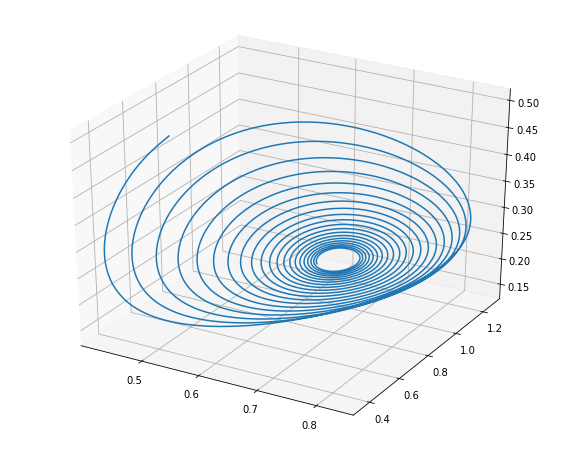

In [96]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection = "3d") #Agregar la tercera dimensión

ax.plot(sol3[:,0],sol3[:,1],sol3[:,2],ms=10)

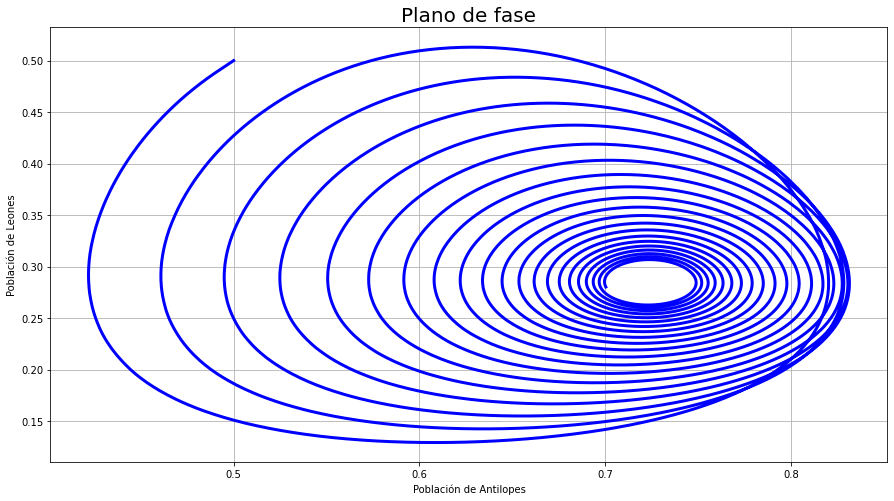

In [97]:
plt.figure(figsize=(15,8))
plt.title("Plano de fase", fontsize=20)
plt.plot(sol3[:,0],sol3[:,2],"b", lw = 3)
plt.xlabel("Población de Antilopes")
plt.ylabel("Población de Leones")
plt.grid()
plt.show()

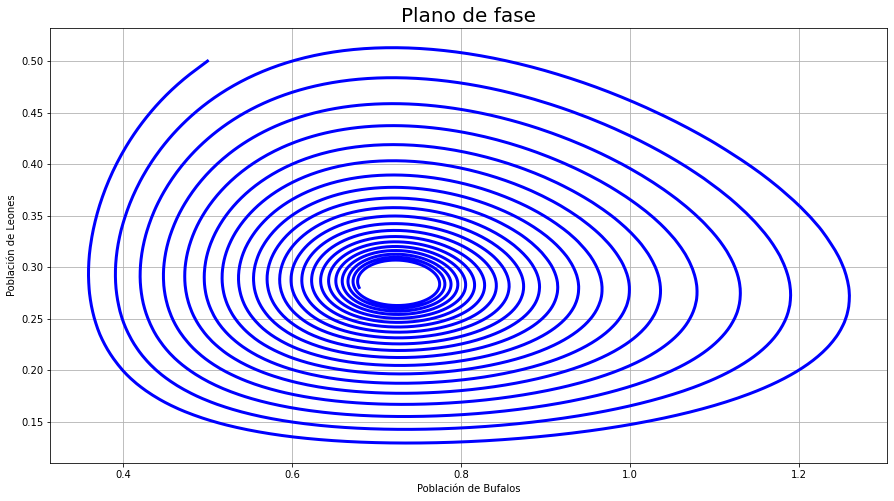

In [99]:
plt.figure(figsize=(15,8))
plt.title("Plano de fase", fontsize=20)
plt.plot(sol3[:,1],sol3[:,2],"b", lw = 3)
plt.xlabel("Población de Bufalos")
plt.ylabel("Población de Leones")
plt.grid()
plt.show()

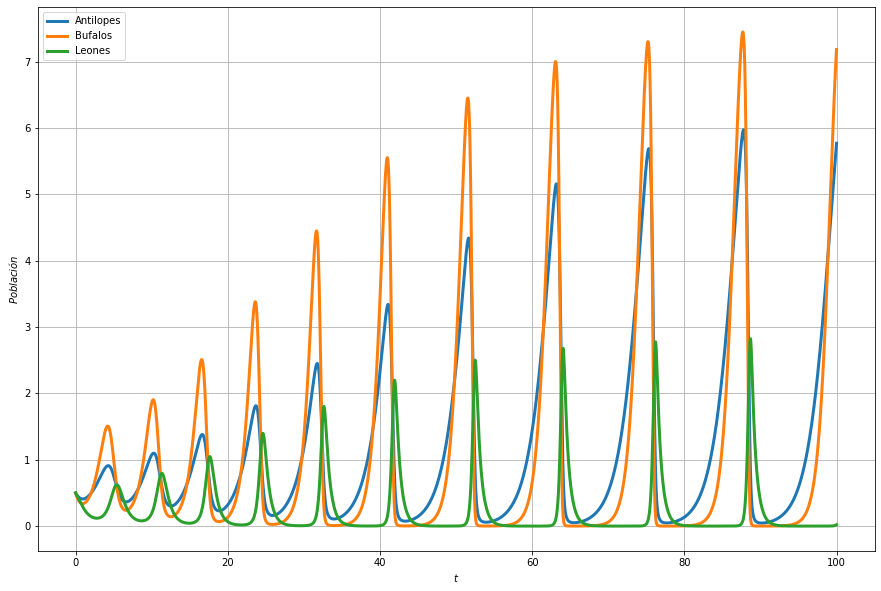

In [89]:
plt.figure(figsize = (15,10))
plt.plot(tt,sol2[:,0], lw = 3, label = "Antilopes")
plt.plot(tt,sol2[:,1], lw = 3, label = "Bufalos")
plt.plot(tt,sol2[:,2], lw = 3, label = "Leones")
plt.xlabel("$t$")
plt.ylabel('$Población$')
plt.legend(loc = "best")
plt.grid()
plt.show()

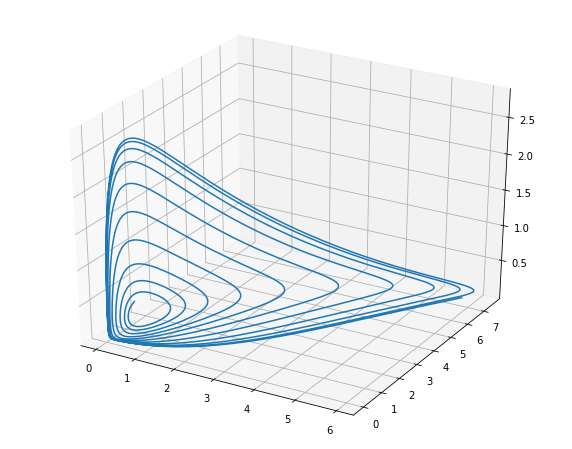

In [90]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection = "3d") #Agregar la tercera dimensión

ax.plot(sol2[:,0],sol2[:,1],sol2[:,2],ms=10)

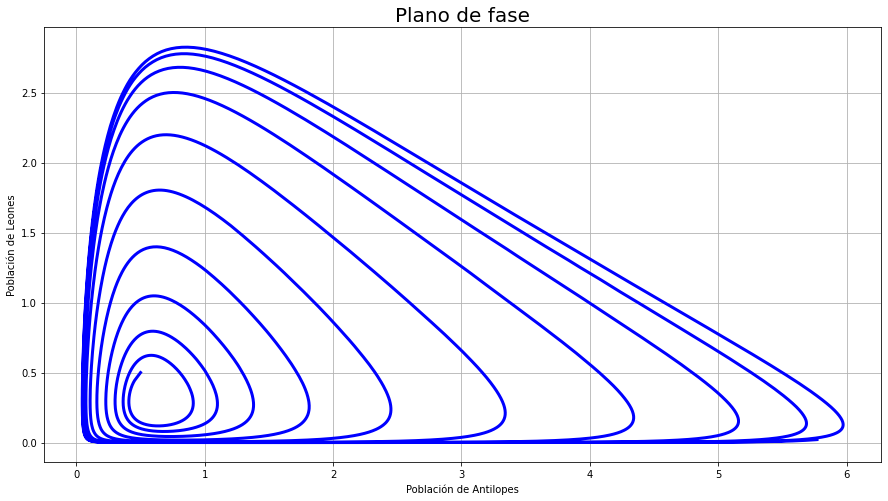

In [91]:
plt.figure(figsize=(15,8))
plt.title("Plano de fase", fontsize=20)
plt.plot(sol2[:,0],sol2[:,2],"b", lw = 3)
plt.xlabel("Población de Antilopes")
plt.ylabel("Población de Leones")
plt.grid()
plt.show()

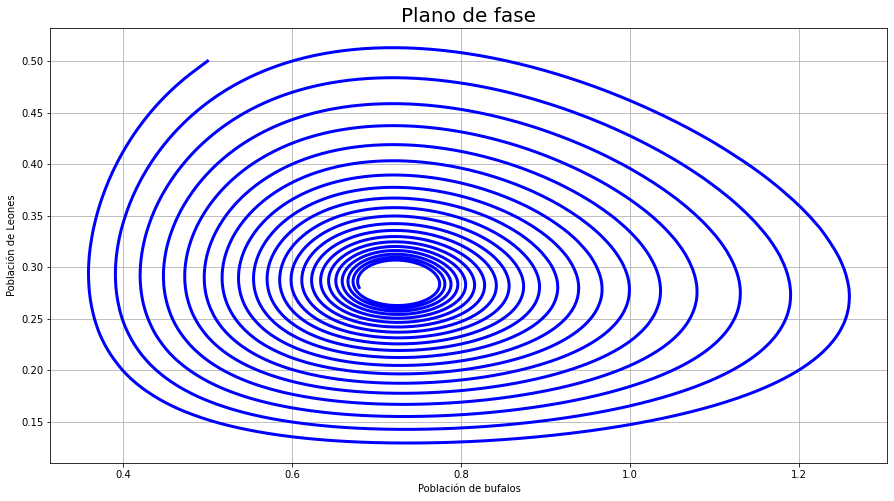

In [100]:
plt.figure(figsize=(15,8))
plt.title("Plano de fase", fontsize=20)
plt.plot(sol2[:,1],sol2[:,2],"b", lw = 3)
plt.xlabel("Población de bufalos")
plt.ylabel("Población de Leones")
plt.grid()
plt.show()

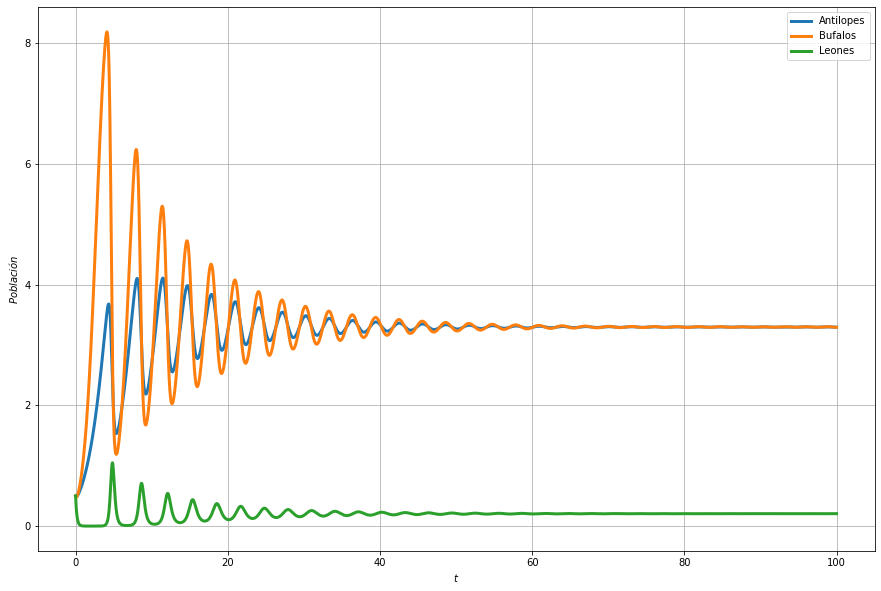

In [108]:
plt.figure(figsize = (15,10))
plt.plot(tt,sol4[:,0], lw = 3, label = "Antilopes")
plt.plot(tt,sol4[:,1], lw = 3, label = "Bufalos")
plt.plot(tt,sol4[:,2], lw = 3, label = "Leones")
plt.xlabel("$t$")
plt.ylabel('$Población$')
plt.legend(loc = "best")
plt.grid()
plt.show()

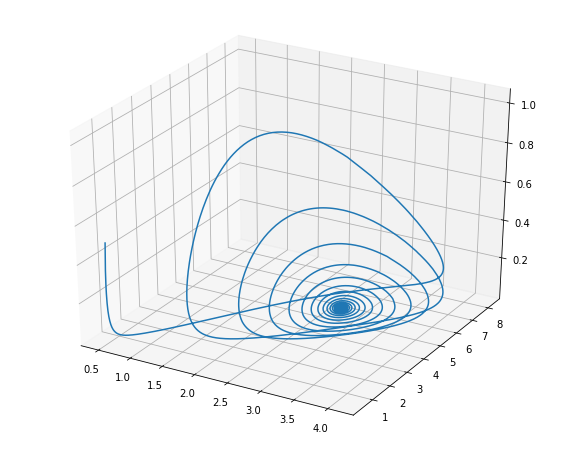

In [109]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection = "3d") #Agregar la tercera dimensión

ax.plot(sol4[:,0],sol4[:,1],sol4[:,2],ms=10)

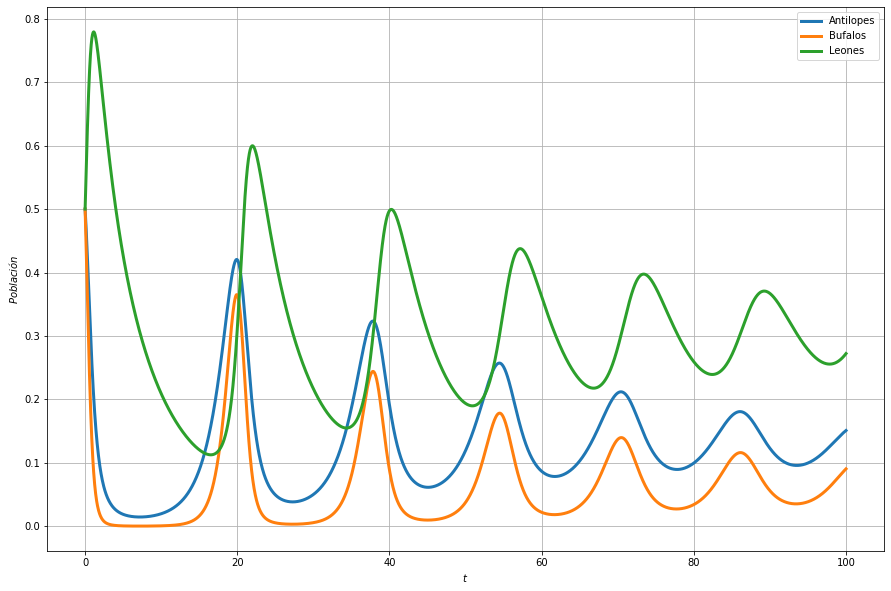

In [113]:
plt.figure(figsize = (15,10))
plt.plot(tt,sol5[:,0], lw = 3, label = "Antilopes")
plt.plot(tt,sol5[:,1], lw = 3, label = "Bufalos")
plt.plot(tt,sol5[:,2], lw = 3, label = "Leones")
plt.xlabel("$t$")
plt.ylabel('$Población$')
plt.legend(loc = "best")
plt.grid()
plt.show()

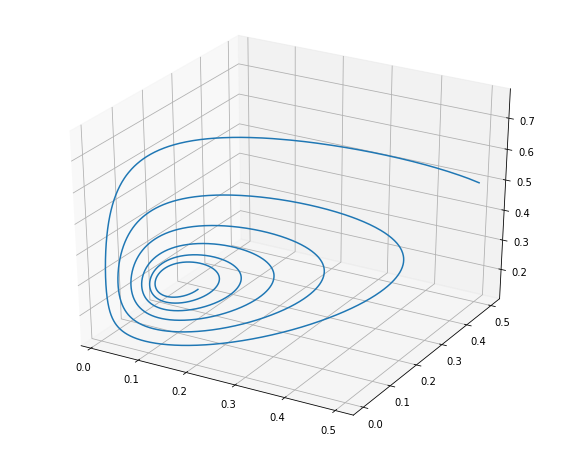

In [114]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection = "3d") #Agregar la tercera dimensión

ax.plot(sol5[:,0],sol5[:,1],sol5[:,2],ms=10)

### 1.7 Conclusiones.
Se cumplió el objetivo general al encontrar un pronostico de las ganancias de un casino dentro de un año de margen en base a los juegos que ofrece el mismo. Logramos simular dos juegos de azar El realizar el proyecto nos permitió ver que la simulación tiene muchas aplicaciones y potencial para preveer fenomenos que estan relacionados con algún factor del azar. Además podemos agregar que con esto entendemos las estrategias en los casinos y nos resta interes en acudir a un lugar así.

### 1.8 Referencias.
> Gebreyohannes, Gebretsadkan. (2016). Prey switching in predtor prey model. 10.13140/RG.2.1.5092.3125. 

> K. Shiva Reddy, M.N. Srinivas, C.V. Pavan Kumar,Dynamics of a two prey and one predator system with time interruption and random fluctuations,Pacific Science Review A: Natural Science and Engineering,Volume 18, Issue 2,2016,Pages 150-156,ISSN 2405-8823, https://doi.org/10.1016/j.psra.2016.10.002.